In [20]:
!pip install pandas

In [21]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split # This line was missing and imports train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
# %%
base_treino = pd.read_csv("dados_processados.csv")
# %%
base_treino.head()
# %%
base_treino.describe()
# %%
# %%
X_treino, X_teste, y_treino, y_teste = train_test_split(base_treino.drop(columns=['Oportunidade de Progressão de Carreira']), base_treino['Oportunidade de Progressão de Carreira'], test_size=0.25, random_state=42)

In [22]:
modelo = DecisionTreeClassifier(criterion='gini', max_depth=4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=4)

In [23]:
previsoes = modelo.predict(X_teste)
previsoes

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
accuracy_score(y_teste,previsoes)

0.49099099099099097

In [25]:
from yellowbrick.classifier import ConfusionMatrix # type: ignore
confusion_matrix(y_teste, previsoes)

array([[74, 47],
       [66, 35]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.49099099099099097

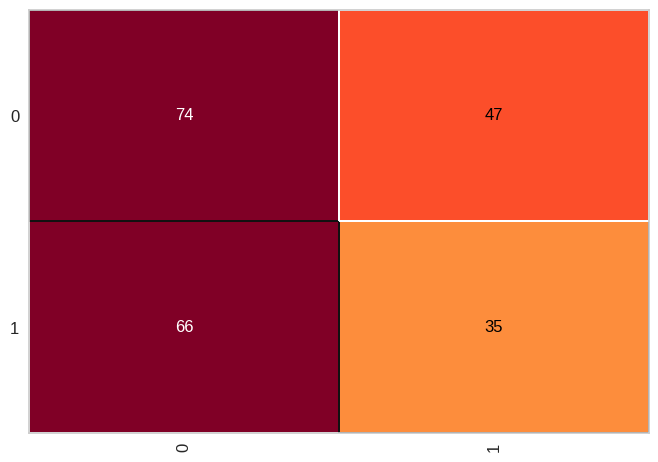

In [26]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [27]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57       121
           1       0.43      0.35      0.38       101

    accuracy                           0.49       222
   macro avg       0.48      0.48      0.47       222
weighted avg       0.48      0.49      0.48       222



In [ ]:
previsores = X_treino.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(30,20))
tree.plot_tree(modelo, feature_names=previsores, class_names = ['Não Prejudicado(a)', 'Prejudicado(a)'], filled=True);
plt.savefig("modelo_arvore.png", dpi=600)